In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.shape

(400, 5)

In [5]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [7]:
X.shape

(400, 2)

In [8]:
y.shape

(400,)

In [10]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [11]:
X_train.shape

(320, 2)

In [12]:
X_test.shape

(80, 2)

In [13]:
## Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [14]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_train

array([[-0.80276277,  0.44295604],
       [-0.70800656,  1.43671337],
       [-0.23422551, -0.5508013 ],
       [ 0.90284902,  1.16568865],
       [-1.0870314 ,  0.4730699 ],
       [-0.89751898, -1.09285075],
       [-0.51849414,  0.95489164],
       [ 1.47138628,  0.41284218],
       [-1.46605624,  0.38272832],
       [-1.75032487, -1.48433091],
       [-0.42373793, -1.12296461],
       [ 0.99760523, -1.00250917],
       [-0.23422551, -1.24342004],
       [ 0.90284902, -1.36387548],
       [ 0.52382418,  1.82819354],
       [-1.65556866, -0.97239532],
       [ 0.14479933,  0.20204517],
       [ 0.05004312, -0.5508013 ],
       [-0.61325035,  0.17193131],
       [-0.32898172, -0.76159831],
       [-0.1394693 ,  1.49694109],
       [ 1.37663007, -1.42410319],
       [-0.23422551, -1.36387548],
       [-0.80276277, -0.21954885],
       [ 0.90284902, -1.30364776],
       [-0.23422551,  0.59352533],
       [ 0.99760523,  1.88842125],
       [-0.61325035, -1.51444477],
       [-1.37130003,

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_test

array([[-1.0870314 ,  0.35261446],
       [ 0.61858039,  2.12933212],
       [-0.04471309,  0.35261446],
       [-0.70800656,  0.3225006 ],
       [-0.99227519, -0.43034586],
       [-0.04471309,  0.35261446],
       [-1.37130003, -1.21330618],
       [ 1.56614249,  1.1958025 ],
       [ 0.23955554, -0.34000428],
       [-0.1394693 ,  1.7077381 ],
       [ 0.80809281,  0.3225006 ],
       [-0.51849414, -1.51444477],
       [ 1.37663007,  2.46058457],
       [ 0.90284902, -0.64114287],
       [-0.51849414,  0.53329761],
       [-0.80276277, -0.76159831],
       [-0.99227519,  0.65375305],
       [ 0.7133366 , -1.2735339 ],
       [-1.37130003, -0.61102901],
       [ 1.85041112,  1.61739652],
       [-0.23422551, -0.09909342],
       [ 0.14479933, -0.79171216],
       [-1.46605624, -0.400232  ],
       [-1.0870314 , -1.60478635],
       [ 0.42906797, -0.43034586],
       [-0.51849414,  2.46058457],
       [ 0.05004312, -0.400232  ],
       [-0.23422551,  0.14181745],
       [ 1.09236144,

In [19]:
## Apply KNN for our data

## Calculate the value of k --- k = sqrt(num of rows in training dataset)
## k =sqrt(320)

np.sqrt(320)

17.88854381999832

In [20]:
k = 17

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=17)

In [23]:
y_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test , y_pred)

0.9125

In [25]:
confusion_matrix(y_test,y_pred)

array([[43,  2],
       [ 5, 30]], dtype=int64)

In [26]:
## calculate k based on trial and error method

accuracy = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test , knn.predict(X_test)))
    
    

In [28]:
len(accuracy)

25

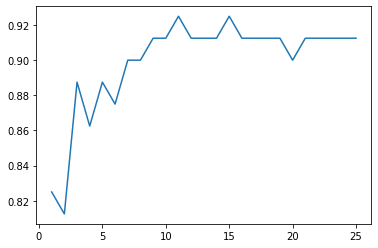

In [29]:
plt.plot(range(1,26) , accuracy)

In [30]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test , y_pred)

0.925

In [31]:
def predict_output():
    age = int(input('Enter the age'))
    salary = int(input('Enter the salary'))
    
    return np.array([[age] , [salary]])

In [32]:
predict_output()

Enter the age20
Enter the salary20000


array([[   20],
       [20000]])

In [40]:
def predict_output():
    age = int(input('Enter the age '))
    salary = int(input('Enter the salary '))
    
    X_new =  np.array([[age] , [salary]]).reshape(1,2)
    X_new = scaler.transform(X_new)
    
    if knn.predict(X_new)[0] == 0:
        return 'Will not purchase'
    else:
        return 'Will purchase'

In [41]:
predict_output()

Enter the age 30
Enter the salary 120000


'Will purchase'

In [42]:
predict_output()

Enter the age 20
Enter the salary 80000


'Will not purchase'